# Initialization values
The simulation will start using the parameter values defined below. Read on to see what this means.  To run the notebook, click "Restart and run all" from the kernel menu above.

In [1]:
from corona_sim_aux import *
N0=300e6 # initial population size
I0=100 # initial number of infected
contact_rate=20 # c: contacts per day
transmission_probability=0.01 #p:  probability
mortality_rate=0.03 # m: proportion of cases that end in death
infection_duration=10 # d: number of days
intervention_time=100 # t: time in days
contact_rate_reduction_factor=0.4 # k: proportion, zero: no intervention, one: all interaction stops

#  Notebook Overview
The plot below shows a simulation of a COVID-19 outbreak in the united states. 

Here is a guide to understanding the names of the relevant variables:
* $S$ is the number of people who are **susceptible** to the coronavirus.
* $I$ is the number of people who are  **infected** with the coronavirus.
* $R$ is the number of people who have  **recovered** and are now immune to the coronavirus.
* $D$ is the number of people who have **died** from the corona virus.

and parameters:

 * $c$ is the **contact rate** (the number of face to face interactions that each person has per day) 
 * $p$ is the **transmission probability** of the coronavirus during an interaction
 * $d$ is the **average infection duration** in days
 * $m$ is the **mortality rate** (the proportion of infections that end in death)
 * $t$ is the **intervention time** (the time when social distancing measures are adopted)
 * $k$ is the **contact rate reduction factor** (the amount we reduce the contact rate by social distancing)
      
If you are interested in reading about the details of the model, and understanding what each parameter means, scroll down to the bottom. 

Otherwise, try moving the sliders to change the parameters of the model to see how our decisions can affect the severity of an outbreak like COVID-19.  

<IPython.core.display.Javascript object>


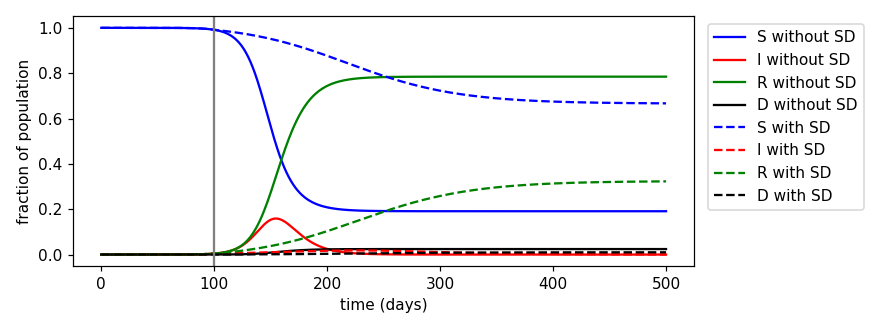

interactive(children=(FloatSlider(value=20.0, description='c'), FloatSlider(value=0.01, description='p', max=0…

In [2]:
%matplotlib notebook

(l1,l2,l3,l4,l5,l6,l7,l8,l9),params,update=make_interactive_plot(N0,
                  I0,
                  contact_rate,
                  transmission_probability,
                  mortality_rate,
                  infection_duration,
                  intervention_time,
                  contact_rate_reduction_factor)
interact(update)
plt.show()

Note how early implementing (and following!) social distancing guidlines can have a dramatic effect on the time course of the disease!

# More details on how the model works


Suppose that the US population can be divided into 4 categories:
* S: Those who are **susceptible** to the coronavirus.
* I: Those who are **infected** with the coronavirus.
* R: Those who are **recovered** and immune to the coronavirus.
* D: Those who have **died** from the corona virus.
For simplicity we will let $N$ denote the entire living population.

The number of people in each category can change due to the following events:

1. Infection:  A susceptible person interacts with an infected person and the result is both people are infected.
$$S+I\rightarrow 2I$$
The total number of infections in a given window of time is given by $\Delta t cp SI/N$ where 
   * $\Delta t$ is the window of time in days
   * $c$ is the **contact rate**, i.e. the number of interactions that each person has per day 
   * $p$ is the **transmission probability** during an interaction
   * $S$ is the number of susceptible people in the population
   * $I/N$ is the probability that an interaction is with an infected person
2. Recovery: An infected person can recover from the disease.
$$I \rightarrow R$$
The total number of recoveries in a given window of time  is given by $\Delta t r I$ 
  * $\Delta t$ is the window of time in days
  * $r$ is the **recovery rate* (i.e. the probability that person recovers on a given day)
  * $I$ is the number of infected people (who could potentially recover).
2. Death: An infected person can dies from the disease.
$$I\rightarrow D$$
The total number of recoveries in a given window of time is given by $\Delta t \delta I$ 
  * $\Delta t$ is the window of time in days
  * $\delta$ is the death rate (i.e. the probability that person dies on a given day)
  * $I$ is the number of infected people (who could potentially recover).

To simplify matters we will define variables $d$ for the **infection duration** and $m$ for the **mortality rate** so that the death rate is $\delta=m/d$ and recovery rate is $r=(1-m)/d$. 

We can model the effect of social distancing by reducing the contact rate.  In other words, when social distancing measures are adopted at time $t$ (aka **intervention time**) we can replace $c$ with $(1-k)c$ where $k$ is the **contact rate reduction factor**.

We can then simulate this probabilitic process with the help of a random number generator and see how different variables affect the outcome.